# Week 2: Linearly Seperate the Area of a Triangle
**Target**: Find a line that bisector the area of a triangle, passing through a fixed point

## Table of Contents
- [0 - Packages and Tools](#0)
- [1 - Triangle Area Bisection Line Passing throught a Fixed Point](#1)
    - [1.1 - Problem Representation](#1-1)
    - [1.2 - Method](#1-2)
    - [1.3 - Result](#1-3)
    - [1.4 - Vertices Classification](#1-4)
    - [1.5 - \*Interactive Plot](#1-5)
- [2 - More General](#2)
    - [2.1 - Established Conclusion](#2-1)
    - [2.2 - Mathmatical Derivation](#2-2)
    - [2.3 - Plot](#2-3)
- [3 - Reference](#3)

<a name='0'></a>
## 0. Package and Tools

In [1]:
# Packages
import numpy as np
import random
import matplotlib.pyplot as plt

# Self-defined functions
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
from util import util

<a name='1'></a>
## 1. Triangle Area Bisection Line Passing throught a Fixed Point

<a name='1-1'></a>
### 1.1 Problem Representation 

Following the last week's work, here I use a point on edge on the target triangle and a random point to define the area bisection line (b-line for short).

#### 1.1.1 Conditions
The coordinates of the three vertices of a triangle are A$(x_1,x_2)$, B$(x_2,y_2)$, and C$(x_3,y_3)$. Assume that P is a point on the edge AB. R$(x_4,x_4)$ is a random point that does not collapse with P. Line $PR$ will bisetor the area of $\triangle_{ABC}$.

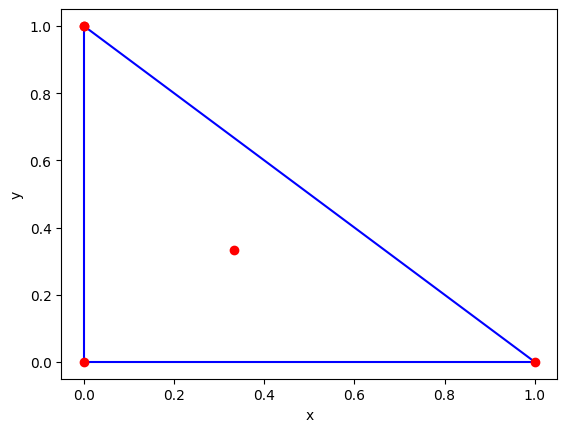

In [42]:
# Example
A = np.array([0,1])
B = np.array([1,0])
C = np.array([0,0])
G = (A + B + C) / 3
R = np.array([0,1])
p0 = np.array([0,0])

# A = np.array([4,2])
# B = np.array([1,9])
# C = np.array([10,1])
    
util.v_triangle_2D(A,B,C)
plt.plot(A[0], A[1], 'o', color='r')
plt.plot(B[0], B[1], 'o', color='r')
plt.plot(C[0], C[1], 'o', color='r')
plt.plot(R[0], R[1], 'o', color='r')
G = util.v_triangle_barycentre(A,B,C)

<a name='1-2'></a>
### 1.2 Method

I first focus on the situation of vertex $A$.

Suppose that $P$ is on edge $AB$ and b-line $PR$ intersect $\triangle_{ABC}$ with Q on edge $AC$. Following the parameterization method last week, the coordinate of $PQ$ could be represented as

$$P = (1 - t_1)A + tB = \left((1 - t_1)x_1 + tx_2, (1 - t_1)y_1 + ty_2\right)$$ 
$$Q = (1 - t_2)A + tC = \left((1 - t_2)x_1 + tx_3, (1 - t_2)y_1 + ty_3\right)$$

Where

$$t_1, t_2 \in [0, 1]$$ 

and

$$ t_1t_2 = \frac{1}{2}$$

so

$$ \frac{1}{2t_1} = t_2 \in [0,1] $$

gives

$$
t_1, t_2 \in [\frac{1}{2}, 1] \tag {1}
$$

As points $PQR$ are collinear

$$ m_{PQ} = m_{PR} $$

gives

$$\frac{y_Q - y_P}{x_Q - x_P}=\frac{y_R - y_P}{x_R - x_P}$$

$$
\frac{((1-t_2)y_1 + t_2y_3) - ((1-t_1)y_1 + t_1y_2)}{((1-t_2)x_1 + t_2x_3) - ((1-t_1)x_1 + t_1x_2)} 
= 
\frac{y_4 - ((1-t_1)y_1 + t_1y_2)}{x_4- ((1-t_1)x_1 + t_1x_2)}\tag {2}
$$

Substitue $t_1$ with $t$ and $t_2 = \frac{1}{2t_1}$:

$$
\frac{(y_1-y_2)t^2 + \frac{1}{2}(y_3-y_1)}{(x_1-x_2)t^2 + \frac{1}{2}(x_3-x_1)} 
= 
\frac{(y_1-y_2)t + (y_4-y_1)}{(x_1-x_2)t + (x_4-x_1)} \tag {3}
$$

Expend:

$$
LHS = (x_1-x_2)(y_1-y_2)t^3 + (x_1-x_2)(y_4-y_1)t^2 + \frac{1}{2}(x_3-x_1)(y_1-y_2)t + \frac{1}{2}(x_1+x_3)(y_4-y_1)
$$

$$
RHS = (x_1-x_2)(y_1-y_2)t^3 + (x_4-x_1)(y_1-y_2)t^2 + \frac{1}{2}(x_1-x_2)(y_3-y_1)t + \frac{1}{2}(x_4+x_1)(y_1-y_3)
$$

Merge homogeneous terms:

$$
LHS = (x_1y_4+x_2y_1-x_2y_4)t^2 + \frac{1}{2}(-x_1y_2+x_3y_1-x_3y_2)t + \frac{1}{2}(x_1y_4-x_3y_1+x_3y_4)
$$

$$
RHS = (x_1y_2+x_4y_1-x_4y_2)t^2 + \frac{1}{2}(x_1y_3-x_2y_1-x_2y_3) + \frac{1}{2}(-x_1y_3+x_4y_1+x_4y_3)
$$

$$
LHS - RHS = 0
$$

Finally

$$
(x_1y_4-x_2y_4+x_2y_1-x_4y_1+x_4y_2-x_1y_2)t^2+\frac{1}{2}(x_1y_2+x_3y_1-x_3y_2-x_1y_3+x_2y_3-x_2y_1)t+\frac{1}{2}(x_3y_4-x_3y_1-x_1y_4-x_4y_3+x_4y_1+x_1y_3)=0\tag{4}
$$

This is a quadratic function about t. Let 

<a name='equation-1'></a>
$$
f(t)=(x_1y_4-x_2y_4+x_2y_1-x_4y_1+x_4y_2-x_1y_2)t^2+\frac{1}{2}(x_1y_2+x_3y_1-x_3y_2-x_1y_3+x_2y_3-x_2y_1)t+\frac{1}{2}(x_3y_4-x_3y_1-x_1y_4-x_4y_3+x_4y_1+x_1y_3)\tag {5}
$$

In [3]:
# Calculate f(t)
def ft(self, p1, p2, p3, p4, t):
    terms = self.compute_quadratic_coefficient(p1, p2, p3, p4)
    return terms[0] * pow(t, 2) + terms[1]*t + terms[2]

def compute_quadratic_coefficient(self, p1, p2, p3, p4):
    quadratic = (p1[0]*p4[1]-p2[0]*p4[1]+p2[0]*p1[1]-p4[0]*p1[1]+p4[0]*p2[1]-p1[0]*p2[1])
    linear = (p1[0]*p2[1]+p3[0]*p1[1]-p3[0]*p2[1]-p1[0]*p3[1]+p2[0]*p3[1]-p2[0]*p1[1])/2
    constant = (p3[0]*p4[1]-p3[0]*p1[1]-p1[0]*p4[1]-p4[0]*p3[1]+p4[0]*p1[1]+p1[0]*p3[1])/2
    return np.array([quadratic, linear, constant])

To solve the equation, let's make the it becomes $f(t)=0, t \in [\frac{1}{2}, 1]$. Since only one b-line can be found that passes through a fixed point on a triangle [\[1\]](#ref-1), which means for $f(t)$ there is excatly one solution in $[\frac{1}{2}, 1]$. This should present that 

$$f(\frac{1}{2})*f(1)<=0$$. 

Since here I only consider point $P$ on edge $AB$, there exist three situations. The conclusion can be used to preliminarily determine where the $P$ is on.

<a name='1-3'></a>
### 1.3 Result

This is the complete code of the target problem

In [334]:
class Triangle_Area_Bisection_2D_Point:
    def __init__(self, vertices, p):
        if(len(vertices) < 3):
            A = np.array([6,9])
            B = np.array([10,14])
            C = np.array([8,28])
            self.vertices = np.array([A, B, C])
        else:
            self.vertices = vertices
        self.t = []
        self.G = (vertices[0] + vertices[1] + vertices[2]) / 3
        self.p = p
        self.P = []
        self.Q = []
        # The thrid vertex of small triangle part
        self.top = []
        # The (unit) direction of the dicision boundary
        self.d = []
        
    def ft(self, p1, p2, p3, p4, t):
        terms = self.compute_quadratic_coefficient(p1, p2, p3, p4)
        return terms[0] * pow(t, 2) + terms[1]*t + terms[2]
    
    def compute_quadratic_coefficient(self, p1, p2, p3, p4):
        quadratic = (p1[0]*p4[1]-p2[0]*p4[1]+p2[0]*p1[1]-p4[0]*p1[1]+p4[0]*p2[1]-p1[0]*p2[1])
        linear = (p1[0]*p2[1]+p3[0]*p1[1]-p3[0]*p2[1]-p1[0]*p3[1]+p2[0]*p3[1]-p2[0]*p1[1])/2
        constant = (p3[0]*p4[1]-p3[0]*p1[1]-p1[0]*p4[1]-p4[0]*p3[1]+p4[0]*p1[1]+p1[0]*p3[1])/2
        return np.array([quadratic, linear, constant])
    
    def compute_quadratic_delta(self, terms):
        return pow(terms[1], 2) - 4 * terms[0] * terms[2]
    
    def compute_t(self, terms):
        delta = self.compute_quadratic_delta(terms)
#         print("delta: ", delta)
        t1 = (-terms[1]+pow(delta, 0.5)) / 2 / terms[0]
        t2 = (-terms[1]-pow(delta, 0.5)) / 2 / terms[0]
        print("t1: ", t1, "t2: ", t2)
        
        if(t1 >= 1/2 - 1e-6 and t1< 1 - 1e-6):
            return t1
        if(t2 >= 1/2 - 1e-6 and t2< 1 - 1e-6):
            return t2
        
        return -1
    
    def solve_quadratic(self, p1, p2, p3):
        terms = self.compute_quadratic_coefficient(p1, p2, p3, self.p)
        t_temp = self.compute_t(terms)
        self.t = self.t + [t_temp]
        return t_temp
    
    def get_t(self):
        if(self.ft(self.vertices[0], self.vertices[1], self.vertices[2], self.p, 0.5)*self.ft(self.vertices[0], self.vertices[1], self.vertices[2], self.p, 1) <= 1e-6):
            t_temp = self.solve_quadratic(self.vertices[0], self.vertices[1], self.vertices[2])
            P_temp = util.linear_interpolation(self.vertices[0], self.vertices[1], t_temp)
            Q_temp = util.linear_interpolation(self.vertices[0], self.vertices[2], 1/2/t_temp)
            d_temp = (P_temp - self.p) / np.linalg.norm(P_temp - self.p)
#             print("1", P_temp, " ", self.p, " ", d_temp, "t", t_temp)
            self.P = self.P + [P_temp]
            self.Q = self.Q + [Q_temp]
            self.d = self.d + [d_temp]
            self.top = self.top + [self.vertices[0]]
            
        if(self.ft(self.vertices[1], self.vertices[2], self.vertices[0], self.p, 0.5)*self.ft(self.vertices[1], self.vertices[2], self.vertices[0], self.p, 1) <= 1e-6):
            t_temp = self.solve_quadratic(self.vertices[1], self.vertices[2], self.vertices[0])
            P_temp = util.linear_interpolation(self.vertices[1], self.vertices[2], t_temp)
            Q_temp = util.linear_interpolation(self.vertices[1], self.vertices[0], 1/2/t_temp)
            d_temp = (P_temp - self.p) / np.linalg.norm(P_temp - self.p)
#             print("2", P_temp, " ", self.p, " ", d_temp, "t", t_temp)
            self.P = self.P + [P_temp]
            self.Q = self.Q + [Q_temp]
            self.d = self.d + [d_temp]
            self.top = self.top + [self.vertices[1]]
            
        if(self.ft(self.vertices[2], self.vertices[0], self.vertices[1], self.p, 0.5)*self.ft(self.vertices[2], self.vertices[0], self.vertices[1], self.p, 1) <= 1e-6):
            t_temp = self.solve_quadratic(self.vertices[2], self.vertices[0], self.vertices[1])
            P_temp = util.linear_interpolation(self.vertices[2], self.vertices[0], t_temp)
            Q_temp = util.linear_interpolation(self.vertices[2], self.vertices[1], 1/2/t_temp)
            d_temp = (P_temp - self.p) / np.linalg.norm(P_temp - self.p)
#             print("3", P_temp, " ", self.p, " ", d_temp, "t", t_temp)
            self.P = self.P + [P_temp]
            self.Q = self.Q + [Q_temp]
            self.d = self.d + [d_temp]
            self.top = self.top + [self.vertices[2]]
            
    def v_decision_boundary(self):
        for i in range(len(self.P)):
            util.v_line_2D(self.p, self.P[i])
            util.v_line_2D(self.p, self.Q[i])
            
    def v_triangle(self):
        util.v_triangle_2D(self.vertices[0], self.vertices[1], self.vertices[2])
        
    def v_vertices(self):
        plt.plot(self.vertices[0][0], self.vertices[0][1], 'o', color='r')
        plt.plot(self.vertices[1][0], self.vertices[1][1], 'o', color='r')
        plt.plot(self.vertices[2][0], self.vertices[2][1], 'o', color='r')
        
    def v_result(self):
        self.v_vertices()
        plt.plot(self.p[0], self.p[1], 'o', color='r')
        self.v_triangle()
        util.v_triangle_barycentre(self.vertices[0], self.vertices[1], self.vertices[2])
        self.get_t()
        self.v_decision_boundary()
    
    def v_trace(self):
        x = np.linspace(-10, 10, 400)
        y = np.linspace(-10, 10, 400)
        x, y = np.meshgrid(x, y)
        coef1=self.compute_coefficients_single(self.vertices[0], self.vertices[1], self.vertices[2])
        z1 = self.compute_trace(coef1, x, y)
        coef2=self.compute_coefficients_single(self.vertices[1], self.vertices[2], self.vertices[0])
        z2 = self.compute_trace(coef2, x, y)
        coef3=self.compute_coefficients_single(self.vertices[2], self.vertices[0], self.vertices[1])
        z3 = self.compute_trace(coef3, x, y)
        
        plt.contour(x, y, z1, levels=[0], colors='r')
        plt.contour(x, y, z2, levels=[0], colors='r')
        plt.contour(x, y, z3, levels=[0], colors='r')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
    
    def compute_trace(self, coef, x, y):
        return coef[0]*(x**2) +coef[1]*x*y +coef[2]*(y**2) +coef[3]*x +coef[4]*y +coef[5]
        
    def compute_coefficients_single(self, a, b, c):
        [_, linear, _]=self.compute_quadratic_coefficient(a,b,c,self.p)
        A = (b[1]-a[1])*(a[1]-c[1])
        B = (b[1]-a[1])*(c[0]-a[0])+(a[0]-b[0])*(a[1]-c[1])
        C = (a[0]-b[0])*(c[0]-a[0])
        D = (b[1]-a[1])*(a[0]*c[1]-c[0]*a[1])+(a[1]-c[1])*(a[0]*b[1]+b[0]*a[1])
        E = (a[0]-b[0])*(a[0]*c[1]-c[0]*a[1])+(c[0]-a[0])*(a[0]*b[1]+b[0]*a[1])
        F = (a[0]*c[1]-c[0]*a[1])*(a[0]*b[1]+b[0]*a[1])-(linear*linear/2)
        return np.array([A,B,C,D,E,F])
        
    def print_info(self):
        print("The coordinates of point P: ", self.P)
        print("The coordinates of point Q: ", self.Q)
        print("The area of triangle: ", util.triangle_area_2D(self.vertices[0], self.vertices[1], self.vertices[2]))
        print("The area of small half-area triangle: ", util.triangle_area_2D(self.P[0], self.Q[0], self.top[0]))

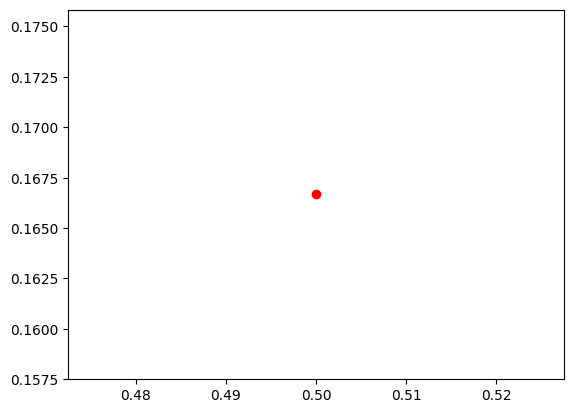

In [343]:
A = np.array([0.5,0.5])
B = np.array([1,0])
C = np.array([0,0])
G = util.v_triangle_barycentre(A,B,C)

t1:  0.9999999999999997 t2:  0.5000000000000001
t1:  1.0 t2:  0.5000000000000001
t1:  0.9999999999999999 t2:  0.5


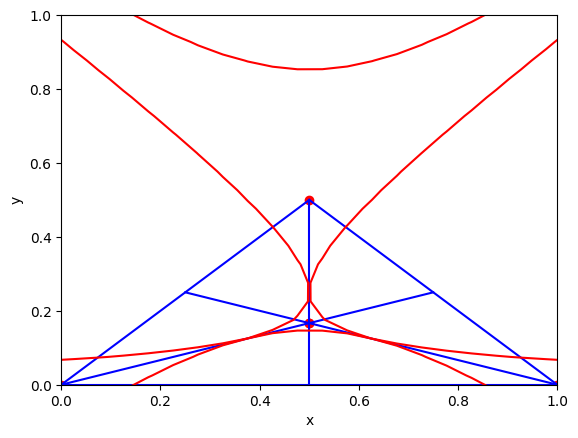

In [344]:
test = Triangle_Area_Bisection_2D_Point(np.array([A,B,C]),G)
test.v_result()
test.v_trace()

t1:  0.5 t2:  0.0
t1:  inf t2:  nan
The coordinates of point P:  [array([0.5, 0.5]), array([2, 0])]
The coordinates of point Q:  [array([0., 0.]), array([ 1.5, -0.5])]
The area of triangle:  0.5
The area of small half-area triangle:  0.25


C:\Users\25615\AppData\Local\Temp\ipykernel_5864\1084960435.py:36: RuntimeWarning: divide by zero encountered in double_scalars
  t1 = (-terms[1]+pow(delta, 0.5)) / 2 / terms[0]
C:\Users\25615\AppData\Local\Temp\ipykernel_5864\1084960435.py:37: RuntimeWarning: invalid value encountered in double_scalars
  t2 = (-terms[1]-pow(delta, 0.5)) / 2 / terms[0]


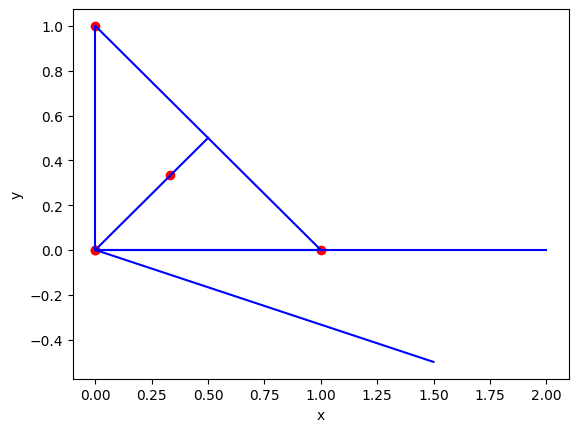

In [176]:
# R = G+np.array([5, 8])
test = Triangle_Area_Bisection_2D_Point(np.array([A,B,C]),np.array([0, 0]))
test.v_result()
test.print_info()

<a name='1-4'></a>
### 1.3 Vertices Classification

<a name='1-5'></a>
### 1.4 \*Interactive Plot

Please check out the **./triangle_bisector_interactive.py** file for more detail.

The program allow users to
+ Sepecify the 3 vertices of triangle interactively
+ Sepecify the point $R$ interactively
+ It will automatically generate the decision boundary

<a name='2'></a>
## 2. More General

In this section, we will discuss the problem in more general situation.

<a name='2-1'></a>
### 2.1 Establish Conclusion

<a name='2-2'></a>
### 2.2 Proof

#### 2.2.1 Target

+ Prove the trace of triangle area-bisectoring line is hyperbola and form deltoid
+ Obtain the expression

#### 2.2.2 General Expression

For simplicity, we replace the coefficients of [$f(t)$](#equation-1) with $a$, $b$ and $c$. Points $R$ becomes any $(x, y)$

$$
a = x_1y-x_2y+x_2y_1-xy_1+xy_2-x_1y_2 \\
= (x_1-x_2)y+(y_2-y_1)x-x_1y_2+x_2y_1\tag {6}
$$

$$
b = \frac{1}{2}(x_1y_2+x_3y_1-x_3y_2-x_1y_3+x_2y_3-x_2y_1) \tag{7}
$$

$$
c = \frac{1}{2}(x_3y-x_3y_1-x_1y-xy_3+xy_1+x_1y_3) \\
= \frac{1}{2}[(x_3-x_1)y+(y_1-y_3)x+x_1y_3-x_3y_1]\tag{8}
$$

And thus

$$
f(t) = at^2 + bt + c \tag {9}
$$

So $f(t) = 0$ are equavilent to

$$at^2 + bt + c = 0 \tag {9}$$ Where
$$t \in [\frac{1}{2}, 1]$$

Differentiate with respect to $t$ gives

$$2at + b = 0$$

$$
t=-\frac{b}{2a}\tag {10}
$$

Back substitude

$$
\frac{b^2}{4a} - \frac{b^2}{2a} + c = 0 \\
ac - \frac{b^2}{4} = 0
$$

As the highest degree of each term of both $a$ and $c$ are 1, and $b$ is a constant. It is obvious that the result of $ac - \frac{b^2}{4}$, which can be represented in the form of $F(x,y)=Ax^2 + Bxy + Cy^2 + Dx + Ey + F = 0$, where

$$
A = (y_2-y_1)(y_1-y_3)
$$

$$
B = (y_2-y_1)(x_3-x_1)+(y_1-y_3)(x_1-x_2)
$$

$$
C = (x_1-x_2)(x_3-x_1)
$$

$$
D = (y_2-y_1)(x_1y_3-x_3y_1)+(y_1-y_3)(x_1y_2+x_2y_1)
$$

$$
E = (x_1-x_2)(x_1y_3-x_3y_1)+(x_3-x_1)(x_1y_2+x_2y_1)
$$

$$
F = (x_1y_2+x_2y_1)(x_1y_3-x_3y_1)-\frac{b^2}{2}
$$

Because the vertices form a triangle, $y_1=y_2$ and $y_2=y_3$ can not be hold true concurrently. This works the same for $x$. Also, the vertices should not overlap, which means for example $y_1=y_2$ and $x_1=x_2$ can be hold true concurrently. This means that $B≠0$. As a result, the trace is a **quadratic curve**.

#### 2.2.3 Prove Hyperbola

To analyze the properties of this quadratic curve, I follow the method presented by [Burdette (1971)](#ref-2). We first calculate $I_2=B^2-4AC$ ("$I$" for invarient)

$$
I_2=[\frac{(y_2-y_1)(x_3-x_1)+(y_1-y_3)(x_1-x_2)}{2}]^2 \tag{12}-(y_2-y_1)(y_1-y_3)(x_1-x_2)(x_3-x_1)
$$

Replace $z_1=(y_2-y_1)(x_3-x_1)$ and $z_2=(y_1-y_3)(x_1-x_2)$ gives

$$
I_2=\frac{(z_1+z_2)^2}{4}-z_1z_2
$$

According to **mean value inequality**, $(z_1+z_2)^2>4z_1z_2$. So $I_2 > 0$, the curve is a hyperbola (see [\[2\]](#ref-2) for more detail)

#### 2.2.3 Parametric Form

As the trace only contains one half, so it can be expressed in such form

$$
x = h + m \cosh(t) \\
y = k + n \sinh(t)
$$

According to [Burdette (1971)](#ref-2), first to eliminate the $Bxy$ term by applying a rotation to the curve. The rotation angle $\theta, \theta \in [-\frac{\pi}{4},\frac{\pi}{4}]$ is

$$
\tan(2\theta)=\frac{B}{A-C}
$$

where $A\neq C$. If $A=C$, then $\theta=45^{\circ}$. Furthermore,the equation $F(x,y)=Ax^2 + Bxy + Cy^2 + Dx + Ey + F = 0$ becomes $F^{\prime}(x,y)=A^{\prime}x^2 + C^{\prime}y^2 + D^{\prime}x + E^{\prime}y + F^{\prime} = 0$ where

$$
A^{\prime}=A\cos^2(\theta)+B\sin(\theta)cos(\theta)+C\sin^2(\theta) \\
C^{\prime}=A\cos^2(\theta)-B\sin(\theta)cos(\theta)+C\sin^2(\theta) \\
D^{\prime}=D\cos(\theta)+E\sin(\theta) \\
E^{\prime}=-D\sin(\theta)+E\cos(\theta) \\
F^{\prime}=F
$$

Thus, the coordinate of the center of the hyperbola $(h,k)$ is

$$(h, k) = \left(\frac{-D^{\prime}}{2A^{\prime}}, \frac{-E^{\prime}}{2C^{\prime}}\right)$$

Suppose that the hyperbola is **horizontal** with $\frac{{(x - h)^2}}{{a^2}} - \frac{{(y - k)^2}}{{b^2}} = 1$

$$
m=\sqrt{\frac{1}{A^{\prime}}(-F^{\prime}+h^2+k^2)} \\
n=\sqrt{\frac{1}{B^{\prime}}(-F^{\prime}+h^2+k^2)}
$$

else if the hyperbola is **vertical**

$$
m=\sqrt{\frac{1}{B^{\prime}}(-F^{\prime}+h^2+k^2)} \\
n=\sqrt{\frac{1}{A^{\prime}}(-F^{\prime}+h^2+k^2)}
$$

<a name='2-3'></a>
### 2.3 Plot

Here is the general code to plot the hyperbolas.

In [390]:
class solve_hyperbola:
    def __init__(self, terms):
        [self.A,self.B,self.C,self.D,self.E,self.F]=terms
        self.coef=[self.A,self.B,self.C,self.D,self.E,self.F]
        self.coef_after_rotation=[]
        self.theta=-np.pi
        self.R=np.array([[0,0],[0,0]])
        self.x0=0
        self.y0=0
        self.center=np.array([self.x0,self.y0])
        self.m=0
        self.n=0
        self.direction=np.array([self.m,self.n])
        self.type=-1
        
    def run(self):
        self.compute_theta()
        self.compute_rotation_matrix()
        self.compute_new_coefficients()
        self.compute_center()
        self.compute_direction()
        self.plot()
        
    def compute_theta(self):
        [A,B,C,D,E,F]=self.coef
        if A-C == 0:
            self.theta = -np.pi/4
        else:
            self.theta = np.arctan(B/(A-C))/2
    
    def compute_rotation_matrix(self):
        self.R=np.matrix([[np.cos(self.theta), -np.sin(self.theta)], [np.sin(self.theta), np.cos(self.theta)]])
    
    def compute_new_coefficients(self):
        [A,B,C,D,E,F]=self.coef
        A_ = A*np.power(np.cos(self.theta),2)+B*np.sin(self.theta)*np.cos(self.theta)+C*np.power(np.sin(self.theta),2)
        B_ = 0
        C_ = A*np.power(np.sin(self.theta),2)-B*np.sin(self.theta)*np.cos(self.theta)+C*np.power(np.cos(self.theta),2)
        D_ = D*np.cos(self.theta)+E*np.sin(self.theta)
        E_ = -D*np.sin(self.theta)+E*np.cos(self.theta)
        F_ = F
        self.coef_after_rotation=np.array([A_,B_,C_,D_,E_,F_])
        
    def compute_center(self):
        [A_, B_, C_, D_, E_, F_] = self.coef_after_rotation
        self.x0 = -(D_/A_/2)
        self.y0 = -(E_/C_/2)
        self.center=np.array([self.x0,self.y0])
    
    def compute_direction(self):
        [A,B,C,D,E,F]=self.coef_after_rotation
        scalar=-F+np.power(self.x0,2)+np.power(self.y0,2)
        print(scalar)
        
        if scalar/C < 0:
            self.m=np.sqrt(scalar/A)                                                       
            self.n=np.sqrt(-scalar/C)
            self.type=1
        else:                                                              
            self.m=np.sqrt(-scalar/A)
            self.n=np.sqrt(scalar/C)
            self.type=0
        self.direction=np.array([self.m,self.n])
    
    def plot(self):
        t = np.linspace(-2*np.pi, 2*np.pi, 1000)
                                
        if self.type:
            x = self.x0 + self.m * np.cosh(t)
            y = self.y0 + self.n * np.sinh(t)
#             p_ = np.matmul(np.linalg.inv(self.R),[-x, y])
        else:
            print("x0: ", self.x0, "y0: ", self.y0)
            print("a: ", self.m, " b", self.n)
            x = self.x0 + self.m * np.sinh(t)
            y = self.y0 + self.n * np.cosh(t)
#             p_ = np.matmul(np.linalg.inv(self.R),[x, -y])

        print("R: ", self.R)
        p = [x,y]
        p = np.matmul(self.R,[x, y])
        
        
        plt.plot(p[0].reshape((1000,1)),p[1].reshape((1000,1)),'b-')
#         plt.plot(p_[0].reshape((1000,1)),p_[1].reshape((1000,1)),'b-')
        plt.plot(self.x0, self.y0, 'o')
                                                              
        # 设置坐标轴的范围
        plt.xlim([-10, 10])
        plt.ylim([-10, 10])
#         plt.xticks(np.arange(-10, 11, 1))
#         plt.yticks(np.arange(-10, 11, 1))

    def debug(self):
        [A,B,C,D,E,F]=self.coef_after_rotation
        scalar=-F+np.power(self.x0,2)+np.power(self.y0,2)
        if(self.type==1):
            print("水平")
            print("a^2", scalar/A, "b^2", scalar/C)
        else:
            print("垂直")
            print("a^2", scalar/C, "b^2", scalar/A)
        print("Coefficients: ", self.coef)
        print("Coefficients after rotation: ", self.coef_after_rotation)
        print("Rotation angle: ", np.pi/self.theta)
        print("Rotation matrix: ", self.R)
        print("x0: ", self.x0, "y0: ", self.y0)
        print("a: ", self.m, " b", self.n)

In [391]:
np.matmul(test2.R, np.array([1,0]))

matrix([[0.92387953, 0.38268343]])

In [392]:
test2.R

matrix([[ 0.92387953, -0.38268343],
        [ 0.38268343,  0.92387953]])

0.125
R:  [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
1.125
x0:  0.3826834323650898 y0:  0.9238795325112867
a:  0.9653913793583739  b 2.330660961045056
R:  [[ 0.92387953 -0.38268343]
 [ 0.38268343  0.92387953]]
1.125
R:  [[ 0.92387953  0.38268343]
 [-0.38268343  0.92387953]]


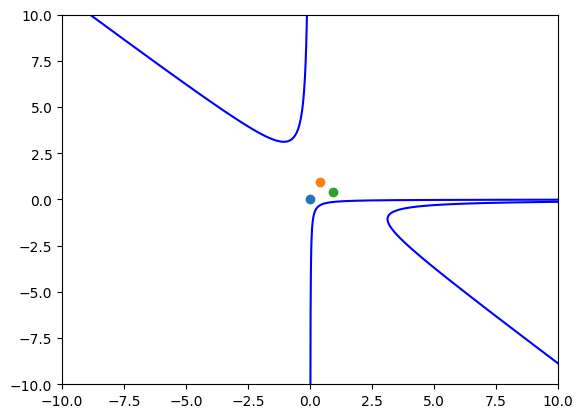

In [394]:
test=solve_hyperbola(np.array([0, -1, 0, 0, 0, -0.125]))
test.run()

test2=solve_hyperbola(np.array([-1, -1, 0, 1, 0, -0.125]))
test2.run()

test3=solve_hyperbola(np.array([0, -1, -1, 0, 1, -0.125]))
test3.run()

In [372]:
test.debug()
print()
test2.debug()
print()
test3.debug()

水平
a^2 0.24999999999999994 b^2 -0.24999999999999994
Coefficients:  [0.0, -1.0, 0.0, 0.0, 0.0, -0.125]
Coefficients after rotation:  [ 0.5    0.    -0.5    0.     0.    -0.125]
Rotation angle:  -4.0
Rotation matrix:  [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
x0:  -0.0 y0:  0.0
a:  0.49999999999999994  b 0.49999999999999994

垂直
a^2 5.431980515339463 b^2 -0.9319805153394639
Coefficients:  [-1.0, -1.0, 0.0, 1.0, 0.0, -0.125]
Coefficients after rotation:  [-1.20710678  0.          0.20710678  0.92387953 -0.38268343 -0.125     ]
Rotation angle:  8.0
Rotation matrix:  [[ 0.92387953 -0.38268343]
 [ 0.38268343  0.92387953]]
x0:  0.3826834323650898 y0:  0.9238795325112867
a:  0.9653913793583739  b 2.330660961045056

水平
a^2 5.431980515339463 b^2 -0.9319805153394639
Coefficients:  [0.0, -1.0, -1.0, 0.0, 1.0, -0.125]
Coefficients after rotation:  [ 0.20710678  0.         -1.20710678 -0.38268343  0.92387953 -0.125     ]
Rotation angle:  -8.0
Rotation matrix:  [[ 0.92387953  0.38268343]


<a name='5'></a>
## 5. Reference

<a name='ref-1'></a>
1. [Craizer, Marcos. "Envelopes of Bisection Lines of Polygons." arXiv preprint arXiv:2203.10559 (2022).](https://arxiv.org/abs/2203.10559)
<a name='ref-2'></a>
1. [Burdette, A. C. (Albert Clark). Analytic Geometry [by] A.C. Burdette. New York: Academic Press, 1971. Print.](https://www-sciencedirect-com.ezproxy.is.ed.ac.uk/book/9780121422561/analytic-geometry)